<a href="https://colab.research.google.com/github/Mlamalerie/Segregation/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Descriptif du projet** 

En 1971, Thomas Schelling proposa un modèle de ségrégation sociale très simple, basé sur le fait qu'un individu (un "agent") 
préfère être entouré d'un certain nombre d'agents identiques. Le modèle considère une grille 2D contenant NxN cases. 
Une case peut être vide, contenir un agent d'un type (par exemple de couleur bleue) ou d'un autre (de couleur rouge). 
Le nombre total d'agents est fixé, de façon à laisser un certain nombre de cases vides. 
La dynamique imposée est simple : pour un agent donné, on compte le nombre total T d'agents dans les 8 cases qui l'entourent, 
le nombre S d'agents identiques, et si S/T est plus petit que C (un seuil critique entre 0 et 1), on déplace l'agent à la case donnée la plus proche. 
Selon les paramètres (nombre d'agents de chaque couleur, taille de la grille, valeur de C), on observera différents comportements dynamiques. 
On pourra notamment trouver des paramètres critiques de transition de phase caractérisant la ségrégation.


In [ ]:
#Library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random

from datetime import datetime

# **I-Initialisation de la grille 2D**

In [ ]:
def init_grille_2D(n,m):
  grille_2D=np.ones((n,m))*(-1) #Grille 2D de cases vides
  return grille_2D

# **II- Affichage de la grille 2D**

In [ ]:
def affiche_grille_2D(grille):
    n,m = grille.shape                                   #Taille de la grille
    for i in range(n):
        for j in range(m):
            agent=grille[i][j]                           #On parcourt la grille
            if(agent==1):                                #Si agent est bleu (soit 1) alors on affiche une croix
                print("X", end=" ")
            elif(agent==2):                              #Sinon si l'agent est rouge (soit 2) alors on affiche un cercle
                print("O", end=" ")
            else:                                        #Sinon on laisse la case vide. 
                print(" ", end=" ")
        print(" ")

# **III - Placer agents sur la grille de façon aléatoire.**

In [ ]:
#Fonction permettant de placer un agent
def placer_agent(grille,i,j,couleur):
  if couleur == "b":
      grille[i][j] = 1
  elif couleur == "r":
      grille[i][j] = 2

In [ ]:
#Fonction permettant de placer N agents
def placer_N_agents(grille, n, couleur):
    for k in range(n):
        i_agent=np.random.randint(0,grille.shape[0])  #Valeurs random des coords (i,j)
        j_agent=np.random.randint(0,grille.shape[1])
        
        while grille[i_agent][j_agent]!=-1 : #Tant que case différente de vide (soit case occupée) on réitère les coords...
            i_agent=np.random.randint(0,grille.shape[0])
            j_agent=np.random.randint(0,grille.shape[1])
        
        placer_agent(grille,i_agent,j_agent,couleur) #Sinon si la case est vide alors appelle de la f* placer 1 agent pour placer l'agent. 

# **IV-Tracer la grille**

In [ ]:
def plot_grille(grille,figsize=(8,8),title=None,display_ticks=True, save=False, namefile=None):
    
    # creation d'une map colorée avec des valeurs discrètes
    cmap = colors.ListedColormap(['white', 'blue',"red"])
    #print(cmap.N)
    bounds = [-1.5,0,1.5,3]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=figsize)
    if title:
        plt.title(title)
    ax.imshow(grille, cmap=cmap,norm=norm)

    # définitions des axes (x,y)
    if display_ticks:
        ax.set_xticks(np.arange(0, grille.shape[0], 1))
        ax.set_yticks(np.arange(0, grille.shape[1],1))
    else:
         ax.set_xticks([])
         ax.set_yticks([])
    
    #Pour ajouter une grille
    #ax.grid(axis='both', linestyle='-', color='k', linewidth=2) 
    
    plt.show()
    if save and namefile:
        if not namefile.endswith(".png"):
            raise ValueError(f" {namefile} : Nom de fichier incorrecte")
        fig.savefig(namefile)
        print(f"{namefile} saved")

#plot_grille(test_grille,display_ticks=False,save=True,namefile="test.png")

# **V-Conditions relative au plaçement des agents**

In [ ]:
#Fonction qui permet de trouver une case vide aléatoirement
def case_vacante(grille):
    k=np.random.randint(0,grille.shape[0])                                      #(k,l) : Valeurs random des coords d'une case vide
    l=np.random.randint(0,grille.shape[1])
    while grille[k][l]!=-1:
        k=np.random.randint(0,grille.shape[0])  
        l=np.random.randint(0,grille.shape[1])
    return k,l

#Fonction qui permet de trouver une case avec un agent bleu ou rouge aléatoirement
def trouver_agent_alea(grille):
    i_agent=np.random.randint(0,grille.shape[0])                                #(i_agent,j_agent) : Valeurs random des coords d'une case vide
    j_agent=np.random.randint(0,grille.shape[1])
    while grille[i_agent][j_agent]==-1:
        i_agent=np.random.randint(0,grille.shape[0])  
        j_agent=np.random.randint(0,grille.shape[1])
    return i_agent,j_agent

In [ ]:
#Fonction qui compte le nombre de voisins identiques et total
def compter_nb_voisins(grille,i_agent,j_agent):
    couleur_agent_X = grille[i_agent][j_agent]                                  #Couleur agent correspondant aux coords (i_agent, j_agent)
    Nt = 0 # nb voisin total
    Ns = 0 # nb voisin identique
    
    # haut
    if i_agent-1 > 0:                                                           #condition limite du haut de la grille
        voisin = grille[i_agent-1][j_agent]
        if voisin != -1:
            Nt += 1
  
        if couleur_agent_X==1:
            if voisin==1:
                Ns+=1
        elif couleur_agent_X==2:
            if voisin==2:
                Ns+=1
    # bas
    if i_agent+1 < grille.shape[0] :                                            #condition limite du bas de la grille
        voisin = grille[i_agent+1][j_agent]
        if voisin != -1:
            Nt += 1
    
        if couleur_agent_X==1:
            if voisin==1:
                Ns+=1
        elif couleur_agent_X==2:
            if voisin==2:
                Ns+=1

    #Les diagonales
    # droite 
    if j_agent+1 < grille.shape[1] :                                            #condition limite du bord droit de la grille
        voisin = grille[i_agent][j_agent+1]
        if voisin != -1:
            Nt += 1

        if couleur_agent_X==1:
            if voisin==1:
                Ns+=1
        elif couleur_agent_X==2:
            if voisin==2:
                Ns+=1
    # gauche
    if j_agent-1 > 0 :                                                          #condition limite du bord gauche de la grille
        voisin = grille[i_agent][j_agent-1]
        if voisin != -1:
            Nt += 1

        if couleur_agent_X==1:
            if voisin==1:
                Ns+=1
        elif couleur_agent_X==2:
            if voisin==2:
                Ns+=1
    # no
    if i_agent-1 > 0 and j_agent-1 > 0 :                                        #À partir de là, "les conditions limite des diagonales de la grille"
        voisin = grille[i_agent-1][j_agent-1]
        if voisin != -1:
            Nt += 1

        if couleur_agent_X==1:
            if voisin==1:
                Ns+=1
        elif couleur_agent_X==2:
            if voisin==2:
                Ns+=1
    # ne 
    if i_agent-1 > 0 and j_agent+1 < grille.shape[1] :
        voisin = grille[i_agent-1][j_agent+1]
        if voisin != -1:
            Nt += 1

        if couleur_agent_X==1:
            if voisin==1:
                Ns+=1
        elif couleur_agent_X==2:
            if voisin==2:
                Ns+=1
    # so 
    if i_agent+1 < grille.shape[0] and j_agent-1 > 0 :
        voisin = grille[i_agent+1][j_agent-1]
        if voisin != -1:
            Nt += 1

        if couleur_agent_X==1:
            if voisin==1:
                Ns+=1
        elif couleur_agent_X==2:
            if voisin==2:
                Ns+=1
    # se
    if i_agent+1 < grille.shape[0] and j_agent+1 < grille.shape[1]:
        voisin = grille[i_agent+1][j_agent+1]
        if voisin != -1:
            Nt += 1

        if couleur_agent_X==1:
            if voisin==1:
                Ns+=1
        elif couleur_agent_X==2:
            if voisin==2:
                Ns+=1  
    
    return Ns,Nt

# **VI-Définition de l'utilité et condition de satisafaction des agents**

In [ ]:
def utility(grille,i_agent,j_agent,T):
    Ns,Nt=compter_nb_voisins(grille,i_agent,j_agent)                            #On compte son nombre de voisins (semblable, total)
    Nd=Nt-Ns                                                                    #Nombre agent différent
    
    if(Nd<=T*Nt):                                                               #Si la condition de satisfaction est respectée, utilité C=1.
        return 1
    else:                                                                       #Sinon utilité C=0. 
        return 0                                             

In [ ]:
def scan_agents(grille, T):
    for i in range(grille.shape[0]):                                            #On parcourt la grille et on scan (pointe) un agent
        for j in range(grille.shape[1]):
            #print(i,j)
            if(grille[i][j]!=-1):               
                utility(grille,i,j,T)                                           #On vérifie la condition de satisfaction
                #print(i,j)
                #print(utility(grille,i,j))
                if(utility(grille,i,j,T)==0):                                   #Si la condition n'est pas satisfaite alors 
                    k,l=case_vacante(grille)                                    #On choisit une case vacante aléatoirement 
                    grille[k][l]=grille[i][j]                                   #On pose l'agent sur la case vacante
                    grille[i][j]=-1                                             #Puis on libère la place à l'endroit où était initialement l'agent. 
                    #print(k,l,i,j)
                    #print(utility(grille,k,l))

# **Programme principal**


In [ ]:
def verif_satisfaction_all(grille, nb_agents_total,T):
    cpt=0
    for i in range(grille.shape[0]):                                           
        for j in range(grille.shape[1]):
            if(grille[i][j]!=-1):
                if(utility(grille,i,j,T)==1):
                    cpt+=1
    #print("verif: ",cpt,nb_agents_total)        
    if(cpt==nb_agents_total):
        return True, cpt                                                        
    else:
        return False, cpt


In [ ]:
def plot_history_satisfaction(history,bleus,rouges, cv, T,save=True, namefile=""):
    nb_agents_total=bleus+rouges
    pourcentages = np.array(history)/nb_agents_total*100    #calcule du pourcentage d'agents satisfaits à chaque pas de temps en divisant le nombre d'agents satisfaits 
                                                            #par le nombre total d'agents et en multipliant par 100
    ici = np.where(pourcentages >= 100, pourcentages, 0)

    fig = plt.figure(figsize=(14,6))                       #Creation d'une figure de taille 14x6
    ax = fig.add_subplot(1, 1, 1)                          #Ajout des axes
    plt.title(f"Pourcentage d'agents satisfaits (Avec, T={T}), {bleus+rouges} agents (b={bleus}, r={rouges}) et {cv} cases vides") #Titre
    
    ax.set_yticks(np.arange(0, 101, 10 if pourcentages.max() > 20 else 1), minor=True) #Definit les graduations des ordonnées dans un intervalle entre 0 et 100 avec un pas de 10.
    ax.grid(which='minor', alpha=0.4)
    ax.grid(which='major', alpha=0.6)
    
    #Tracer des points représentant le pourcentage d'agents satisfaits qui sont supérieurs ou égaux à 99 % (point rouge) et égaux à 100 % (point noir).
    #ax.grid(linestyle="--") #Ajout d'une grille au tracer
    ax.plot(pourcentages,linewidth=5.0,c="purple", label='% satisfaction')
    p = 99
    ax.scatter([i for i in range(len(pourcentages)) if 100 > pourcentages[i] >= p ], [pourcentages[i] for i in range(len(pourcentages)) if 100 > pourcentages[i] >= p], s=45,marker="H",c="red", label='% > 99.0')
    ax.scatter([i for i in range(len(pourcentages)) if pourcentages[i] == 100], [pourcentages[i] for i in range(len(pourcentages)) if pourcentages[i] == 100], s=60,marker="H",c="black", label='% == 100.0')
    
    #Affichage du tracer et enregistrement sous la forme d'un fichier
    ax.legend()
    plt.show()
    if save and namefile:
        if not namefile.endswith(".png"):
            raise ValueError(f" {namefile} : Nom de fichier incorrecte")
        fig.savefig(namefile)
        print(f"{namefile} saved")


In [ ]:
def main(shape_grille=(10,10),nb_agents_bleu=40,nb_agents_rouge=40,T=3/8,ITER_MAX=100000,iters_to_plot = [5,50,500]):
    # Vérification des paramètres
    nb_agents_total=nb_agents_bleu+nb_agents_rouge
    grille_capacity = shape_grille[0]*shape_grille[1]
    if nb_agents_total >= grille_capacity:
        raise ValueError("Le nombre d'agents est supérieur à la capacité de la grille")
    
    cases_vides = grille_capacity - nb_agents_total
    params_str = f"(grille={shape_grille}, bleus={nb_agents_bleu}, rouges={nb_agents_rouge}, T={T}, ITER_MAX={ITER_MAX}) {datetime.now().strftime('%d-%m-%Y %H:%M')}"
    
    # Initialisation de la grille initial
    grille=init_grille_2D(*shape_grille)                                        
    placer_N_agents(grille,nb_agents_bleu, "b") #placer agent bleu
    placer_N_agents(grille,nb_agents_rouge, "r") #placer agent rouge
    history_grille = [grille.copy()]
    iter=0
    plot_grille(grille,display_ticks = False,save=True,namefile=f"plot {params_str} i={iter} (init).png")
    print("\n") 
   
    #Tracer de la grille finale (avec condition de satisfaction appliquée)
    ok, cpt_satisfaction = verif_satisfaction_all(grille,nb_agents_total,T)
    history_cpt_satisfaction = [cpt_satisfaction]
    while not ok and iter<ITER_MAX:
        scan_agents(grille,T) #mouvements
        ok, cpt_satisfaction = verif_satisfaction_all(grille,nb_agents_total,T)
        # save historique
        history_grille.append(grille.copy())
        history_cpt_satisfaction.append(cpt_satisfaction)
        iter+=1
    
    #Fin de la boucle
    #Affiches des grilles aux itérations spécifiés
    for i in iters_to_plot:
        if i < iter:
            print(f"(i={i})")
            plot_grille(history_grille[i],display_ticks=False,save=True,namefile=f"plot {params_str} i={i}.png")
            print("\n") 
    
    #Affichage de la grille final
    print(f"final (i={iter})")          
    plot_grille(history_grille[-1],display_ticks=False,save=True,namefile=f"plot {params_str} i={iter} (final).png")
    print("\n")

    #Affichage de l'évolution de la satifaction
    if ok:
        print(f"> Fin du programme.\n> Pourcentage de satisfactions final : {cpt_satisfaction/nb_agents_total*100}%", "-> Tout le monde est satisfait :)" if ok else "")       
    
    plot_history_satisfaction(history_cpt_satisfaction,nb_agents_bleu,nb_agents_rouge,cases_vides,T=T,save=True,namefile=f"plot {params_str} courbe de satisfaction.png")                                                         #On trace 
    return history_grille,history_cpt_satisfaction,iter,nb_agents_total, cases_vides


#history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(10,10),nb_agents_bleu=40,nb_agents_rouge=40,T=3/8,ITER_MAX=100,verbose=True)

# Executions avec différentes paramètres + commentaires

## Différents T avec : 200 CV

- shape_grille=(50,50) -> 2500
- nb_agents_bleu=1150
- nb_agents_rouge=1150
- cases vides -> 200


### T = 1/8

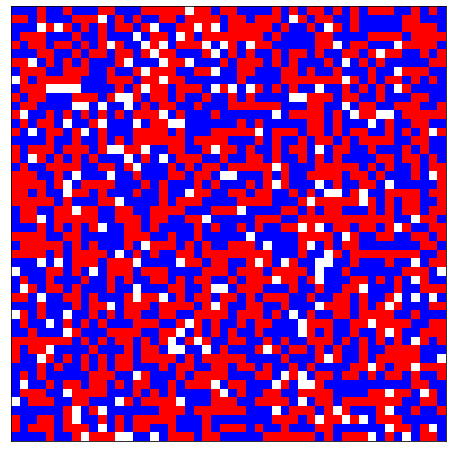

plot (grille=(50, 50), bleus=1150, rouges=1150, T=0.125, ITER_MAX=1000) 08-01-2023 14:10 i=0 (init).png saved


(i=5)


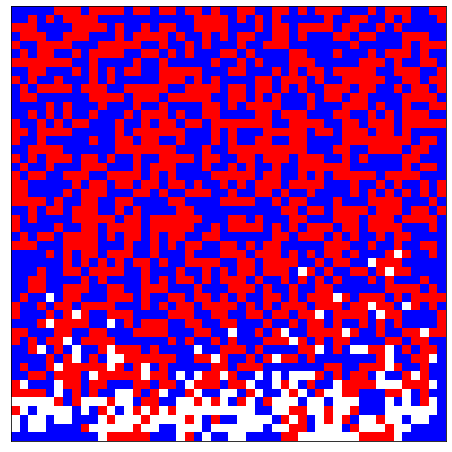

plot (grille=(50, 50), bleus=1150, rouges=1150, T=0.125, ITER_MAX=1000) 08-01-2023 14:10 i=5.png saved


(i=50)


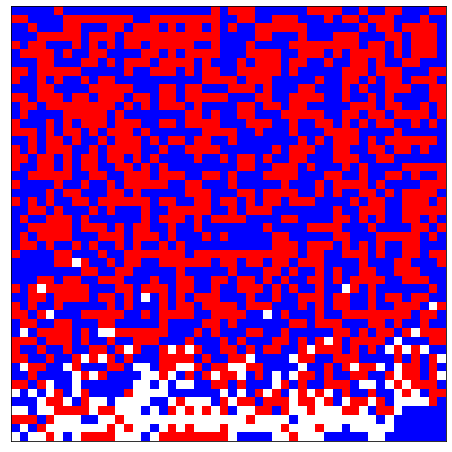

plot (grille=(50, 50), bleus=1150, rouges=1150, T=0.125, ITER_MAX=1000) 08-01-2023 14:10 i=50.png saved


(i=500)


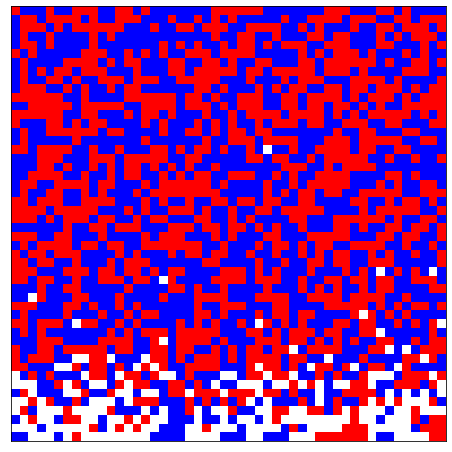

plot (grille=(50, 50), bleus=1150, rouges=1150, T=0.125, ITER_MAX=1000) 08-01-2023 14:10 i=500.png saved


final (i=1000)


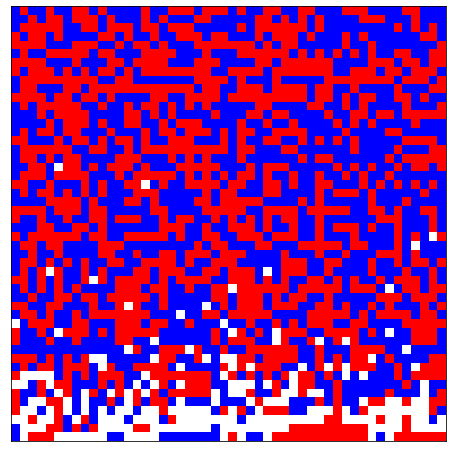

plot (grille=(50, 50), bleus=1150, rouges=1150, T=0.125, ITER_MAX=1000) 08-01-2023 14:10 i=1000 (final).png saved




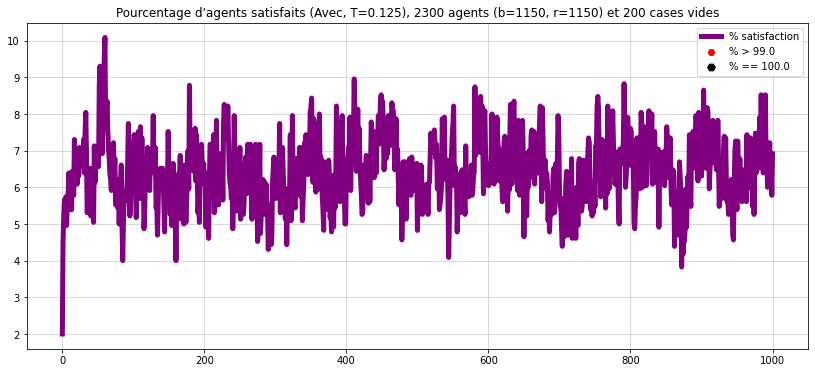

plot (grille=(50, 50), bleus=1150, rouges=1150, T=0.125, ITER_MAX=1000) 08-01-2023 14:10 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total,cases_vides = main(shape_grille=(50,50),nb_agents_bleu=1150,nb_agents_rouge=1150,T=1/8,ITER_MAX=1000)

### T = 4/8


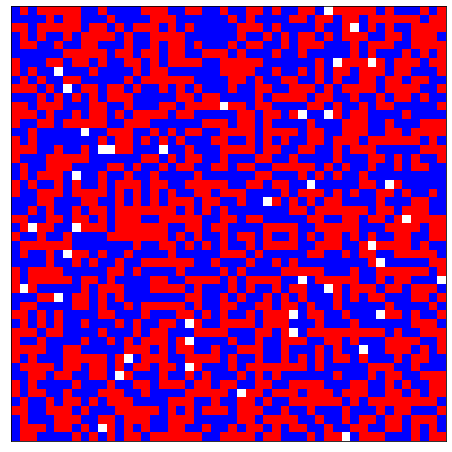

plot (grille=(50, 50), bleus=1230, rouges=1230, T=0.5, ITER_MAX=200) 11-01-2023 10:34 i=0 (init).png saved


(i=5)


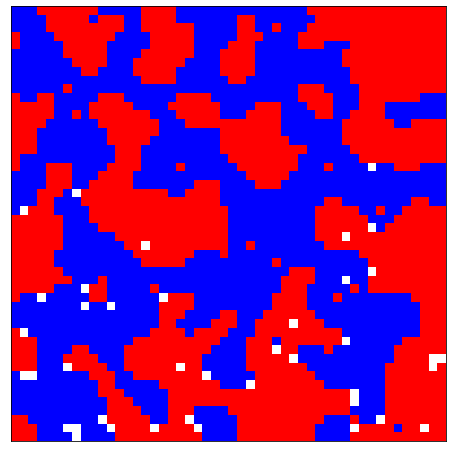

plot (grille=(50, 50), bleus=1230, rouges=1230, T=0.5, ITER_MAX=200) 11-01-2023 10:34 i=5.png saved


(i=50)


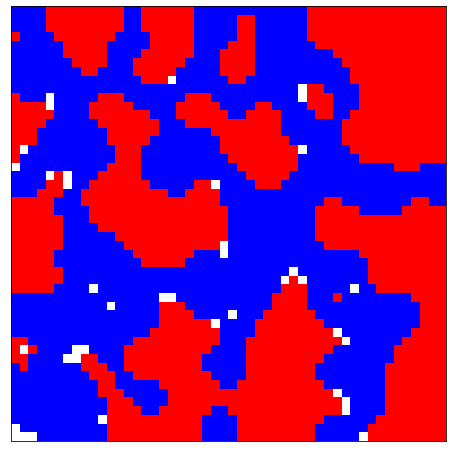

plot (grille=(50, 50), bleus=1230, rouges=1230, T=0.5, ITER_MAX=200) 11-01-2023 10:34 i=50.png saved


final (i=200)


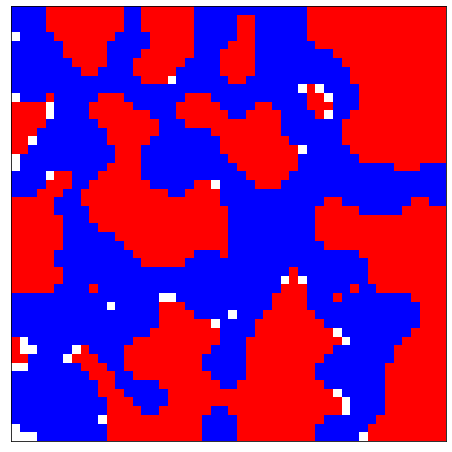

plot (grille=(50, 50), bleus=1230, rouges=1230, T=0.5, ITER_MAX=200) 11-01-2023 10:34 i=200 (final).png saved




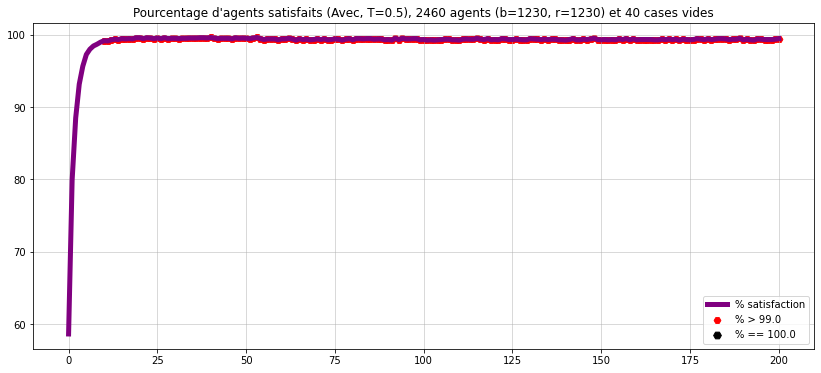

plot (grille=(50, 50), bleus=1230, rouges=1230, T=0.5, ITER_MAX=200) 11-01-2023 10:34 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=1230,nb_agents_rouge=1230,T=4/8,ITER_MAX=200)

### T = 7/8

In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=1150,nb_agents_rouge=1150,T=7/8,ITER_MAX=200)

## Différents T avec : 750 CV

- shape_grille=(50,50) -> 2500
- nb_agents_bleu=875
- nb_agents_rouge=875
- cases vides ->  750

### T = 1/8

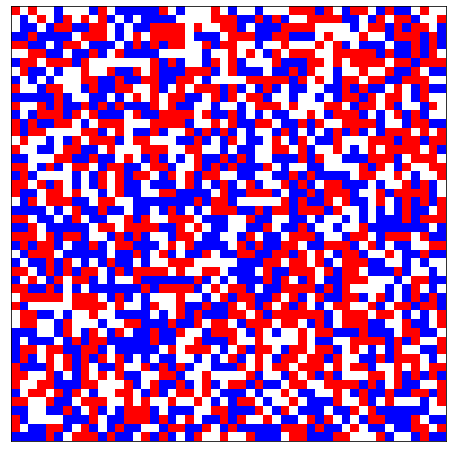

plot (grille=(50, 50), bleus=875, rouges=875, T=0.125, ITER_MAX=1000) 07-01-2023 20:39 i=0 (init).png saved


(i=5)


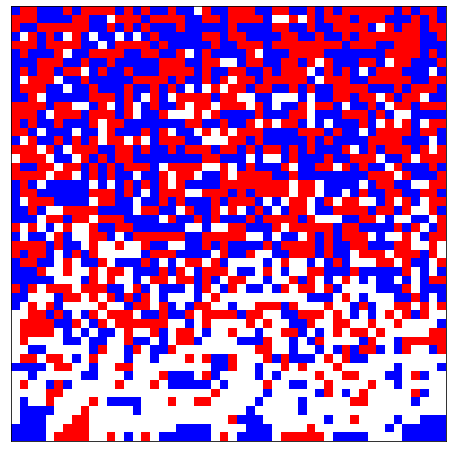

plot (grille=(50, 50), bleus=875, rouges=875, T=0.125, ITER_MAX=1000) 07-01-2023 20:39 i=5.png saved


(i=50)


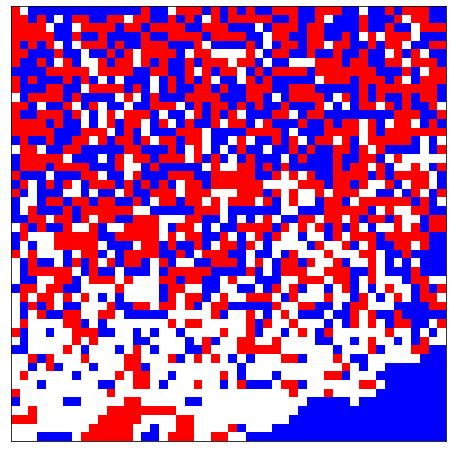

plot (grille=(50, 50), bleus=875, rouges=875, T=0.125, ITER_MAX=1000) 07-01-2023 20:39 i=50.png saved


(i=500)


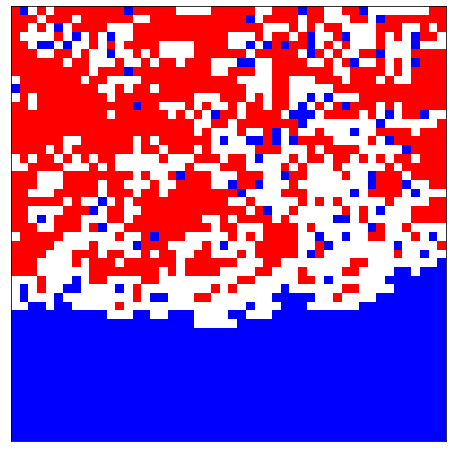

plot (grille=(50, 50), bleus=875, rouges=875, T=0.125, ITER_MAX=1000) 07-01-2023 20:39 i=500.png saved


final (i=723)


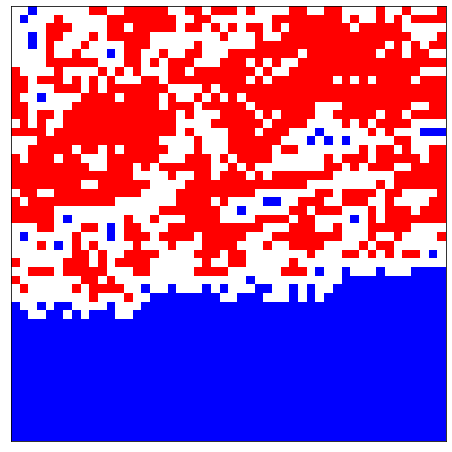

plot (grille=(50, 50), bleus=875, rouges=875, T=0.125, ITER_MAX=1000) 07-01-2023 20:39 i=723 (final).png saved


> Fin du programme.
> Pourcentage de satisfactions final : 100.0% -> Tout le monde est satisfait :)


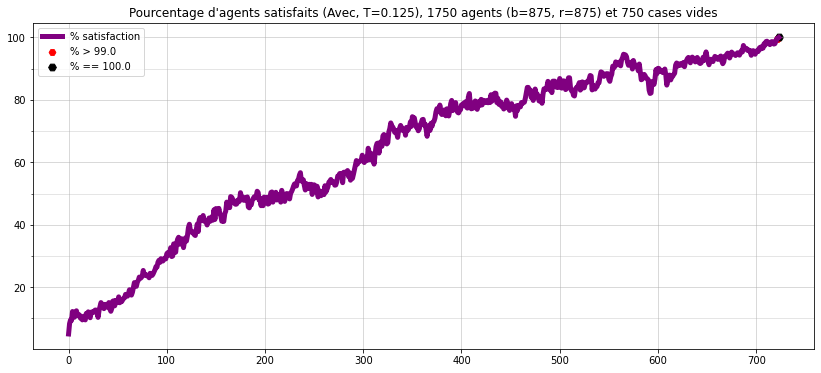

plot (grille=(50, 50), bleus=875, rouges=875, T=0.125, ITER_MAX=1000) 07-01-2023 20:39 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=875,nb_agents_rouge=875,T=1/8,ITER_MAX=1000)

### T = 4/8

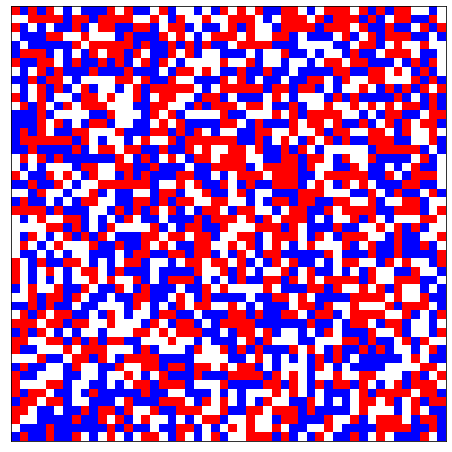

plot (grille=(50, 50), bleus=875, rouges=875, T=0.5, ITER_MAX=1000) 07-01-2023 20:44 i=0 (init).png saved


(i=5)


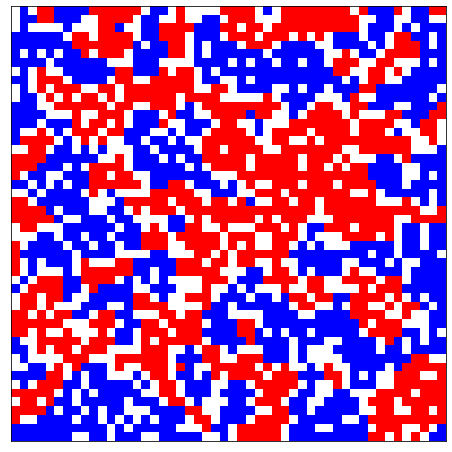

plot (grille=(50, 50), bleus=875, rouges=875, T=0.5, ITER_MAX=1000) 07-01-2023 20:44 i=5.png saved


final (i=10)


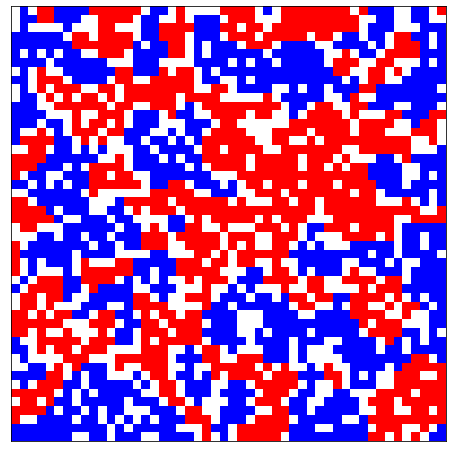

plot (grille=(50, 50), bleus=875, rouges=875, T=0.5, ITER_MAX=1000) 07-01-2023 20:44 i=10 (final).png saved


> Fin du programme.
> Pourcentage de satisfactions final : 100.0% -> Tout le monde est satisfait :)


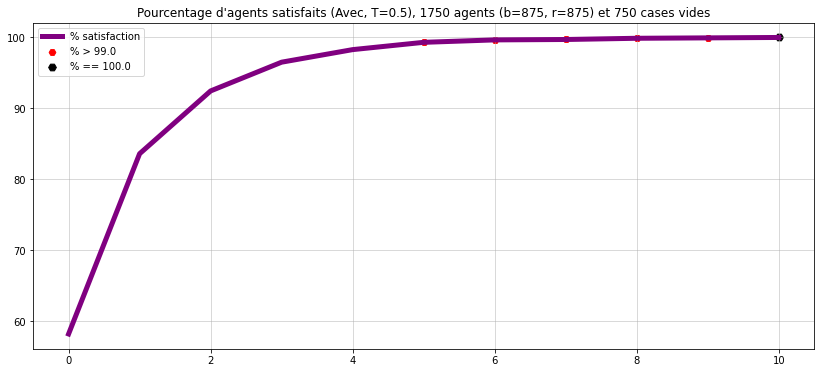

plot (grille=(50, 50), bleus=875, rouges=875, T=0.5, ITER_MAX=1000) 07-01-2023 20:44 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=875,nb_agents_rouge=875,T=4/8,ITER_MAX=1000)

### T = 7/8

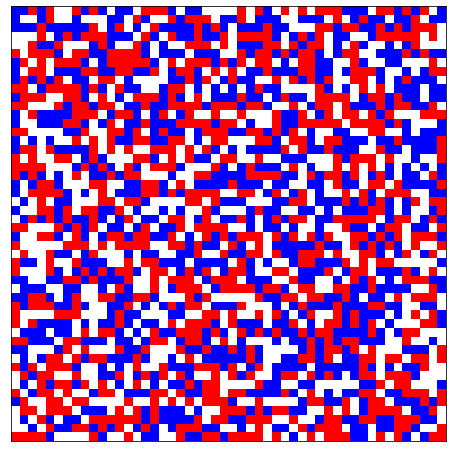

plot (grille=(50, 50), bleus=875, rouges=875, T=0.875, ITER_MAX=1000) 07-01-2023 20:46 i=0 (init).png saved


final (i=3)


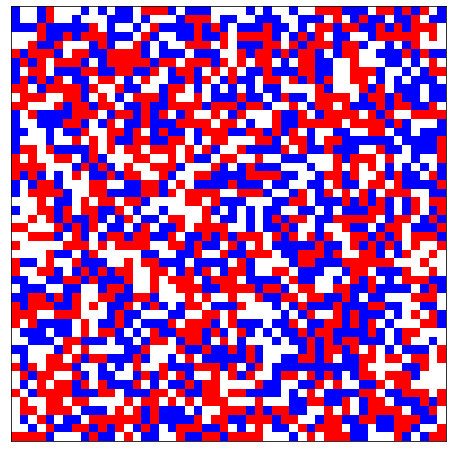

plot (grille=(50, 50), bleus=875, rouges=875, T=0.875, ITER_MAX=1000) 07-01-2023 20:46 i=3 (final).png saved


> Fin du programme.
> Pourcentage de satisfactions final : 100.0% -> Tout le monde est satisfait :)


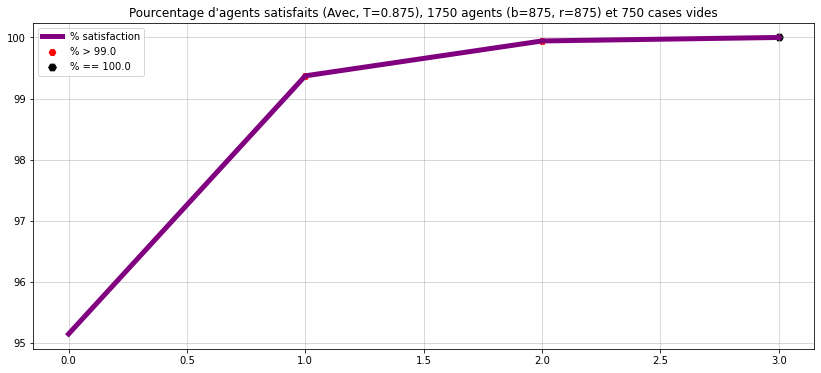

plot (grille=(50, 50), bleus=875, rouges=875, T=0.875, ITER_MAX=1000) 07-01-2023 20:46 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=875,nb_agents_rouge=875,T=7/8,ITER_MAX=1000)

## Différents T avec : 1250 CV

- shape_grille=(50,50) -> 2500
- nb_agents_bleu=625
- nb_agents_rouge=625
- cases vides -> 1250

### T = 1/8

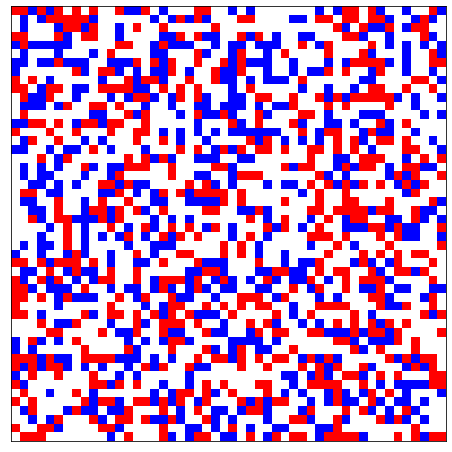

plot (grille=(50, 50), bleus=625, rouges=625, T=0.125, ITER_MAX=1000) 07-01-2023 20:50 i=0 (init).png saved


(i=5)


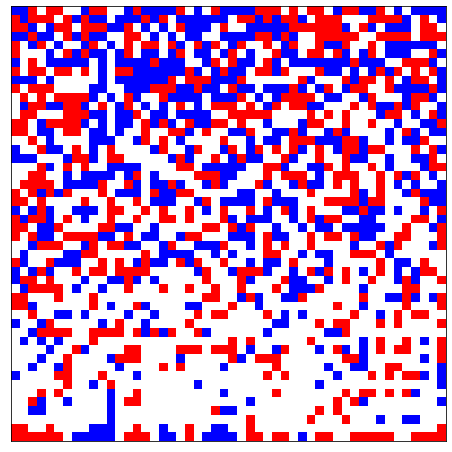

plot (grille=(50, 50), bleus=625, rouges=625, T=0.125, ITER_MAX=1000) 07-01-2023 20:50 i=5.png saved


(i=50)


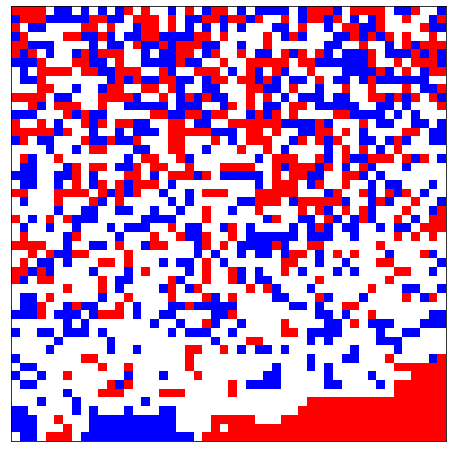

plot (grille=(50, 50), bleus=625, rouges=625, T=0.125, ITER_MAX=1000) 07-01-2023 20:50 i=50.png saved


final (i=296)


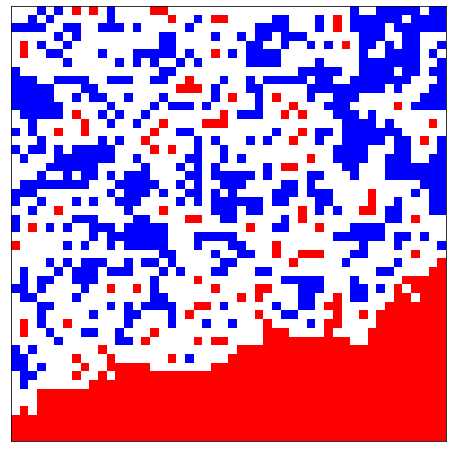

plot (grille=(50, 50), bleus=625, rouges=625, T=0.125, ITER_MAX=1000) 07-01-2023 20:50 i=296 (final).png saved


> Fin du programme.
> Pourcentage de satisfactions final : 100.0% -> Tout le monde est satisfait :)


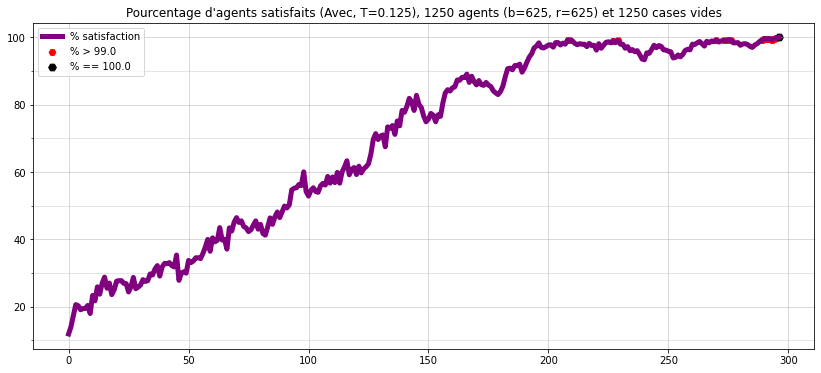

plot (grille=(50, 50), bleus=625, rouges=625, T=0.125, ITER_MAX=1000) 07-01-2023 20:50 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=625,nb_agents_rouge=625,T=1/8,ITER_MAX=1000)

### T = 4/8

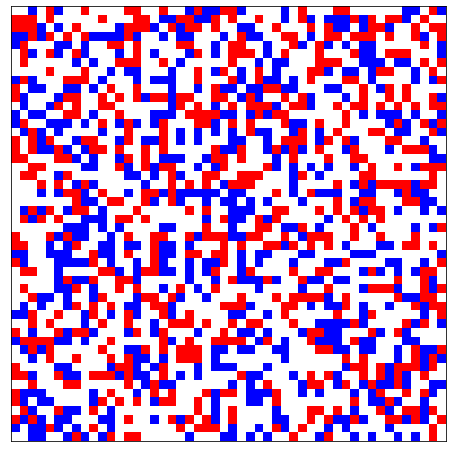

plot (grille=(50, 50), bleus=625, rouges=625, T=0.5, ITER_MAX=1000) 07-01-2023 20:51 i=0 (init).png saved


(i=5)


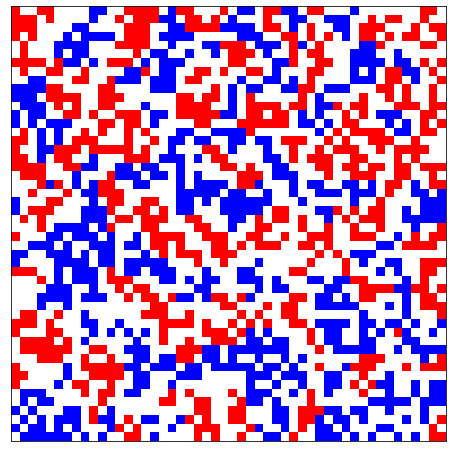

plot (grille=(50, 50), bleus=625, rouges=625, T=0.5, ITER_MAX=1000) 07-01-2023 20:51 i=5.png saved


final (i=11)


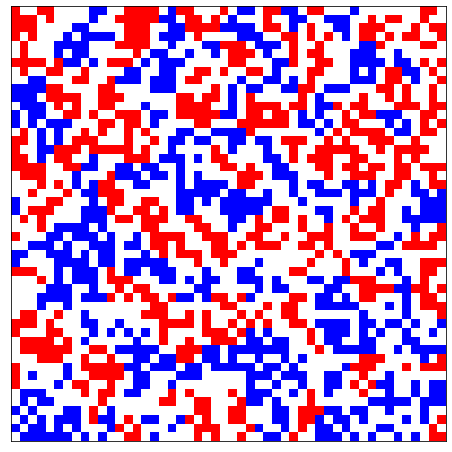

plot (grille=(50, 50), bleus=625, rouges=625, T=0.5, ITER_MAX=1000) 07-01-2023 20:51 i=11 (final).png saved


> Fin du programme.
> Pourcentage de satisfactions final : 100.0% -> Tout le monde est satisfait :)


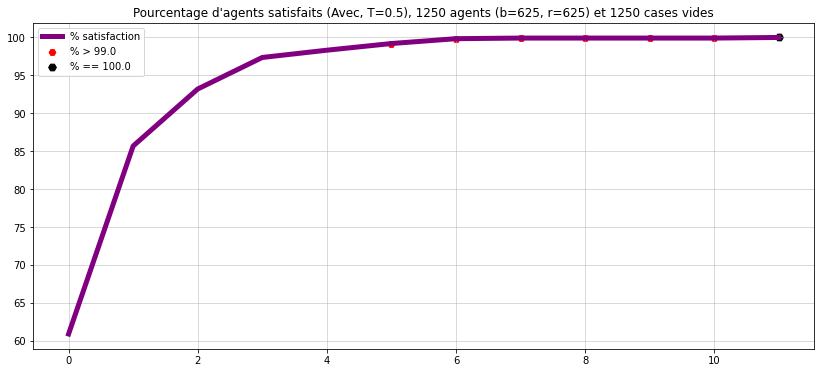

plot (grille=(50, 50), bleus=625, rouges=625, T=0.5, ITER_MAX=1000) 07-01-2023 20:51 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=625,nb_agents_rouge=625,T=4/8,ITER_MAX=1000)

### T = 7/8

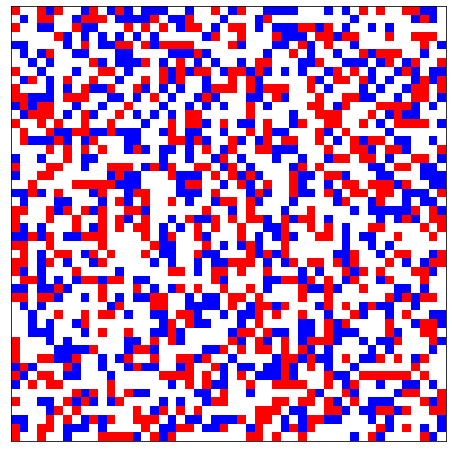

plot (grille=(50, 50), bleus=625, rouges=625, T=0.875, ITER_MAX=1000) 07-01-2023 20:53 i=0 (init).png saved


final (i=2)


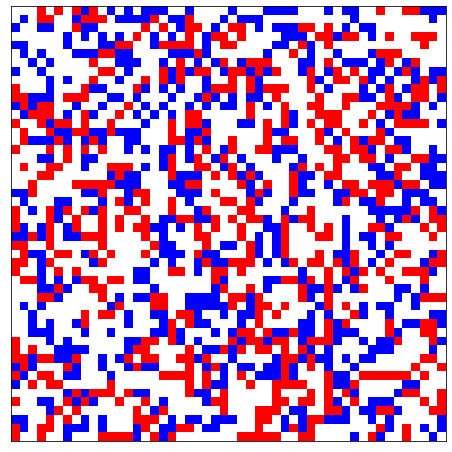

plot (grille=(50, 50), bleus=625, rouges=625, T=0.875, ITER_MAX=1000) 07-01-2023 20:53 i=2 (final).png saved


> Fin du programme.
> Pourcentage de satisfactions final : 100.0% -> Tout le monde est satisfait :)


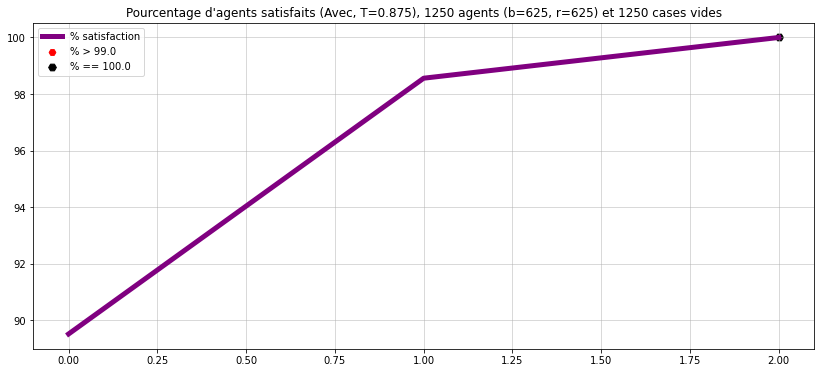

plot (grille=(50, 50), bleus=625, rouges=625, T=0.875, ITER_MAX=1000) 07-01-2023 20:53 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=625,nb_agents_rouge=625,T=7/8,ITER_MAX=1000)

##Test avec un nombre d'agents différents : 

### T = 1/8

In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=1200,nb_agents_rouge=438,T=1/8,ITER_MAX=1000)

### T = 4/8

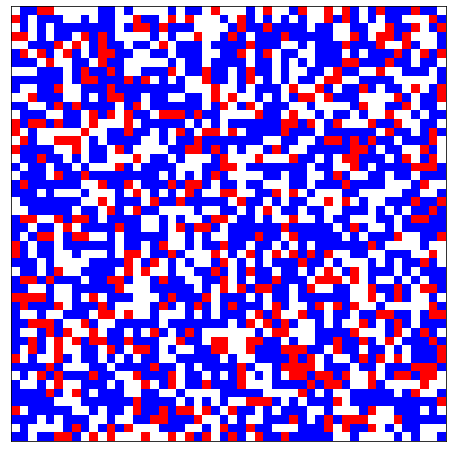

plot (grille=(50, 50), bleus=1200, rouges=438, T=0.5, ITER_MAX=1000) 08-01-2023 10:34 i=0 (init).png saved


(i=5)


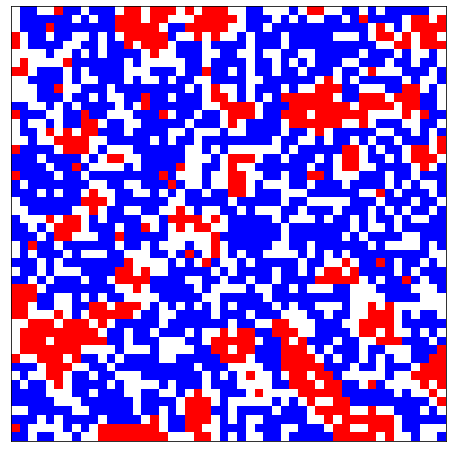

plot (grille=(50, 50), bleus=1200, rouges=438, T=0.5, ITER_MAX=1000) 08-01-2023 10:34 i=5.png saved


final (i=15)


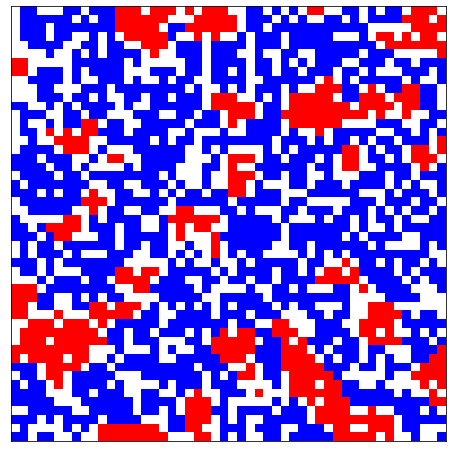

plot (grille=(50, 50), bleus=1200, rouges=438, T=0.5, ITER_MAX=1000) 08-01-2023 10:34 i=15 (final).png saved


> Fin du programme.
> Pourcentage de satisfactions final : 100.0% -> Tout le monde est satisfait :)


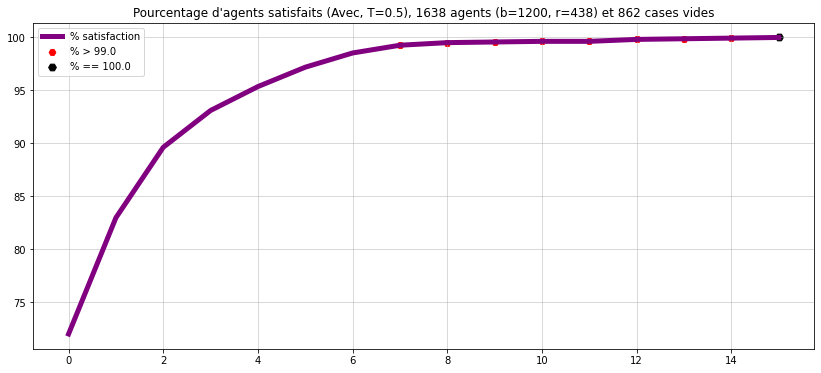

plot (grille=(50, 50), bleus=1200, rouges=438, T=0.5, ITER_MAX=1000) 08-01-2023 10:34 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=1200,nb_agents_rouge=438,T=4/8,ITER_MAX=1000)

### T = 7/8

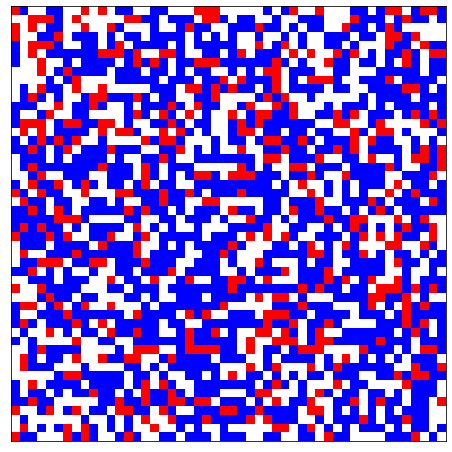

plot (grille=(50, 50), bleus=1200, rouges=438, T=0.875, ITER_MAX=1000) 08-01-2023 10:34 i=0 (init).png saved


final (i=5)


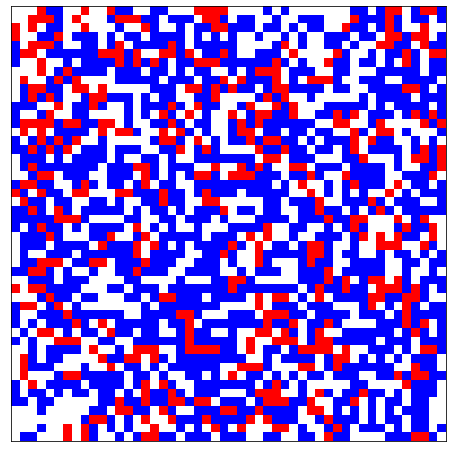

plot (grille=(50, 50), bleus=1200, rouges=438, T=0.875, ITER_MAX=1000) 08-01-2023 10:34 i=5 (final).png saved


> Fin du programme.
> Pourcentage de satisfactions final : 100.0% -> Tout le monde est satisfait :)


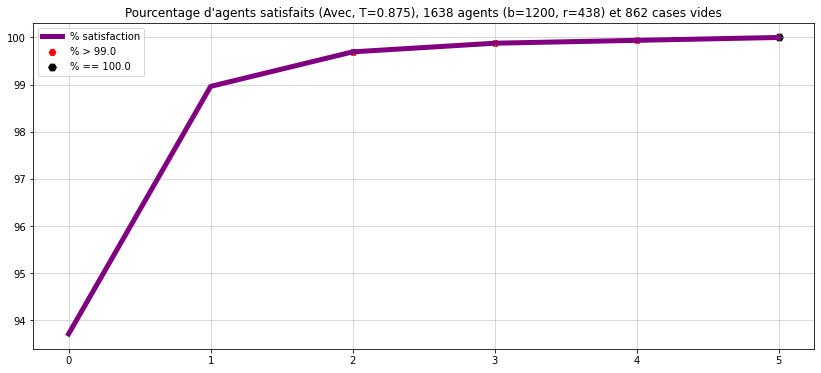

plot (grille=(50, 50), bleus=1200, rouges=438, T=0.875, ITER_MAX=1000) 08-01-2023 10:34 courbe de satisfaction.png saved


In [ ]:
history_grille,history_cpt_satisfaction, final_iter,nb_agents_total, cases_vides = main(shape_grille=(50,50),nb_agents_bleu=1200,nb_agents_rouge=438,T=7/8,ITER_MAX=1000)